# 📊 Impact of Female Education on Economic Growth  

###  Capstone Project: Open-Ended (Data Science for Social Good)


## Problem Statement and Objective

-Female education is widely considered a key factor in economic development, yet large disparities
still exist across countries.  
-Understanding how female education impacts economic growth can help
inform better policy decisions and public awareness.   

This project aims to explore whether higher
levels of female education are associated with stronger economic outcomes.

The objective of this project is to analyze the relationship between female education indicators
and economic growth using global data.  

The study applies data analysis and machine learning
techniques to identify important factors influencing GDP per capita.



## Research Questions

1. Is female education associated with higher GDP per capita across countries?
2. Which female education indicators have the strongest impact on economic growth?
3. Can machine learning models predict GDP per capita using education-related features?


##  Dataset Description

This study uses publicly available datasets obtained from the World Bank Open Data platform.

### Data Sources
- **Female Education Indicator:** Adult Female Literacy Rate (% of females ages 15+)
- **Economic Indicator:** GDP per capita (current US$)

The datasets provide country-level information across multiple years,
allowing both cross-sectional and temporal analysis.


##  Tools & Technologies Used

- Python
- Jupyter Notebook / Google Colab
- Pandas & NumPy for data manipulation
- Matplotlib & Seaborn for data visualization
- Scikit-learn for Machine learning

---

## Data Loading and Understanding

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# For better visuals
plt.style.use('default')

In [3]:
# Load dataset

gdp = pd.read_csv('/content/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2.csv', skiprows=4)
edu = pd.read_csv('/content/API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_4692.csv', skiprows=4)

In [4]:
# Display few rows

print("GDP Dataset:")
display(gdp.head())
print("\nEducation Dataset:")
display(edu.head())

GDP Dataset:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.550214,28440.041688,30082.158423,30645.890602,22759.807175,26749.329609,30975.998912,35718.753119,39498.594129,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.089204,186.909053,197.367547,225.400079,208.962717,226.836135,...,1334.470500,1528.104224,1552.073722,1507.085600,1351.591669,1562.416175,1679.327622,1571.449189,1615.396356,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.936832,127.451040,133.823783,139.004980,148.545883,155.561897,...,1630.039439,1574.230564,1720.140092,2216.385055,2030.861659,2112.794076,2138.473153,1841.855064,1411.337029,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2051.814621,2790.718869,2860.093648,2493.678844,1759.356199,2303.908127,3682.113151,2916.136633,2665.874448,NaN



Education Dataset:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.822762,65.035553,66.002068,67.351593,67.614594,67.493172,68.010681,68.488983,68.983200,NaN
2,Afghanistan,AFG,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.682690,22.600000,26.600000,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,46.737492,47.762878,51.646858,51.634521,51.851700,52.157360,52.472969,52.756161,52.934639,NaN
4,Angola,AGO,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Basic info
print("GDP Dataset info:")
display(gdp.info())
print("\nEducation Dataset info:")
display(edu.info())


GDP Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            151 non-null    float64
 5   1961            154 non-null    float64
 6   1962            156 non-null    float64
 7   1963            156 non-null    float64
 8   1964            156 non-null    float64
 9   1965            162 non-null    float64
 10  1966            163 non-null    float64
 11  1967            167 non-null    float64
 12  1968            168 non-null    float64
 13  1969            168 non-null    float64
 14  1970            190 non-null    float64
 15  1971            191 non-null    float64
 16  1972            191 non-null    float64
 17  1973            1

None


Education Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            3 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973      

None

## Data Cleaning and Reshaping

The raw World bank datasets contain metadata columns and year -wise values in a wide format . To make the data suitable for analysis and modelling ,unnecessary columns were removed and the datasets were reshaped into a long format where each row represents a country-year observation.

In [6]:
# Dropping columns that are not required for analysis

gdp = gdp.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 69'], axis=1, errors='ignore')
edu = edu.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 69'], axis=1, errors='ignore')

Why?  
Indicator information is constant and does not contribute to analysis or prediction.

In [7]:
# Reshaping the dataset

gdp_long = gdp.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='GDP_per_capita'
)

edu_long = edu.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Female_Education'
)

In [8]:
# Data Type Conversion

gdp_long['Year'] = gdp_long['Year'].astype(int)
edu_long['Year'] = edu_long['Year'].astype(int)

gdp_long['GDP_per_capita'] = pd.to_numeric(gdp_long['GDP_per_capita'], errors='coerce')
edu_long['Female_Education'] = pd.to_numeric(edu_long['Female_Education'], errors='coerce')

Why?  
- Years must be numeric for filtering and analysis
- Non-numeric values are safely converted to missing values


### Dataset Merging

In [9]:
data = pd.merge(
    gdp_long,
    edu_long,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner'
)

In [10]:
#check final dataset

data.head()

,Country Name,Country Code,Year,GDP_per_capita,Female_Education
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,186.089204,NaN
2,Afghanistan,AFG,1960,NaN,NaN
3,Africa Western and Central,AFW,1960,121.936832,NaN
4,Angola,AGO,1960,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      17290 non-null  object 
 1   Country Code      17290 non-null  object 
 2   Year              17290 non-null  int64  
 3   GDP_per_capita    14561 non-null  float64
 4   Female_Education  2839 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 675.5+ KB


### Handling Missing values

In [12]:
data.isnull().sum()

,0
Country Name,0
Country Code,0
Year,0
GDP_per_capita,2729
Female_Education,14451


In [13]:
data.shape

(17290, 5)

In [14]:
df = data.dropna(subset = ["GDP_per_capita" , "Female_Education"])
df.shape

(2804, 5)

## Exploratory Data Analysis (EDA)

In this , we explore key questions to understand how female education related to economic development .

In [15]:
#Basic Statistical summary

df[["Female_Education" , "GDP_per_capita"]].describe()

,Female_Education,GDP_per_capita
count,2804.000000,2804.000000
mean,70.025567,5131.724557
std,22.535452,9420.212298
min,3.390000,39.290869
25%,51.306485,838.018548
50%,73.878750,1993.826816
75%,91.600012,5755.266965
max,100.000000,108470.387023


### Questions:
1. How does female education(%) vary across countries and years?

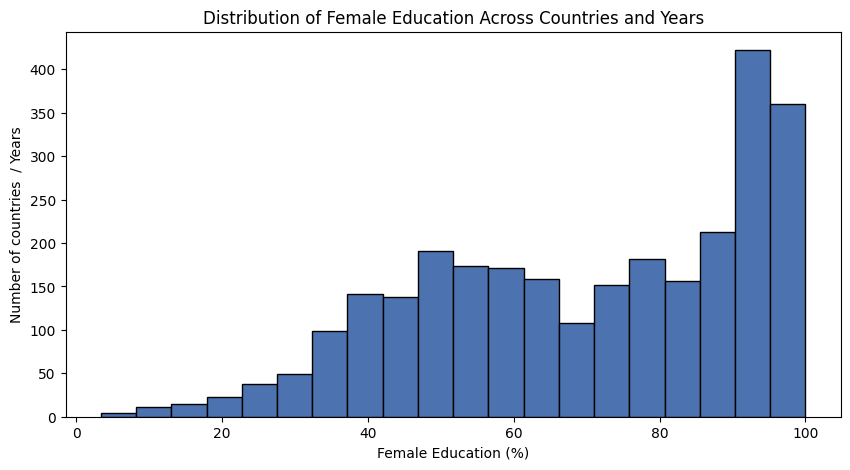

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df["Female_Education"]  ,bins = 20 ,color = "#4C72B0" , edgecolor = 'black')
plt.xlabel("Female Education (%)")
plt.ylabel("Number of countries  / Years")
plt.title("Distribution of Female Education Across Countries and Years")
plt.show()

Most countries lie in the mid to high range of female education, indicating overall global improvment over time.

2. What is the relationship between female education and GDP per capita?

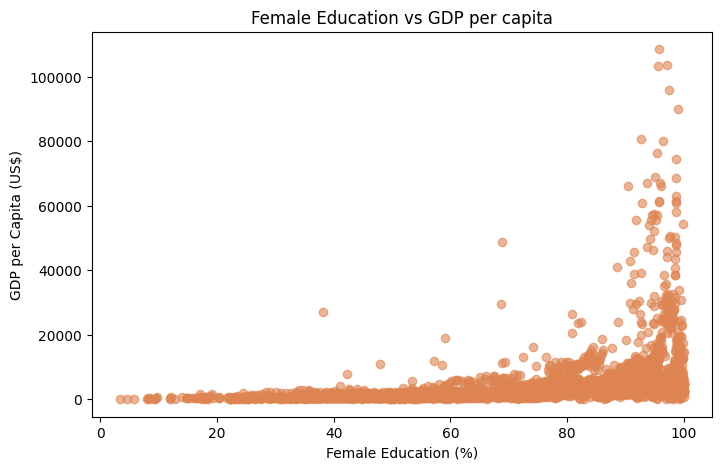

In [17]:
plt.figure(figsize = (8,5))
plt.scatter(df["Female_Education"] , df["GDP_per_capita"],alpha=0.6,color= '#DD8452')
plt.xlabel("Female Education (%)")
plt.ylabel("GDP per Capita (US$)")
plt.title("Female Education vs GDP per capita")
plt.show()

Countries with low female education mostly have low GDP per capita , while higher GDP values appear mainly at higher female education levels.

3. How strong is the correlation between female education and GDP per capita?

In [18]:
corr_value = df[["Female_Education" , "GDP_per_capita"]].corr().iloc[0,1]
print("Correlation between Female Education and GDP per capita:")
round(corr_value,2)

Correlation between Female Education and GDP per capita:


np.float64(0.43)

There is a moderate positive correlation (≈0.43) between female education and GDP per capita, meaning higher female education is generally associated with higher economic growth.

## Feature Engineering and Data Preparation

In this, we prepare the dataset for machine learning models by selecting relevant features and applying scaling where necessary . Since the dataset already contains clean numerical variables, minimal feature engineering is required.

In [19]:
#Features and Target selection

X = df[["Female_Education"]]
y = df["GDP_per_capita"]


In [20]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building
In This , Multiple regression models are trained to unerstand how well female educatio indicators can predict GDP per capita.  
Both linear and non-linear models are evaluated to comapare their performance.

### Linear Regression (Baseline Model)
Linear Regression provides a baseline understanding of the relationship between female education and GDP per capita.

In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


print("Linear Regression R2 Score:", round(r2_score(y_test, y_pred_lr), 3))
print("Linear Regression RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 2))

Linear Regression R2 Score: 0.219
Linear Regression RMSE: 7824.27


### Ridge Regression (handles multicollinearity)

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression R2 Score:", round(r2_score(y_test, y_pred_ridge), 3))
print("Ridge Regression RMSE:", round(mean_squared_error(y_test, y_pred_ridge), 2))


Ridge Regression R2 Score: 0.219
Ridge Regression RMSE: 61219449.03


### Lasso Regression (feature importance insight)

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression R2 Score:", round(r2_score(y_test, y_pred_lasso), 3))
print("Lasso Regression RMSE:", round(mean_squared_error(y_test, y_pred_lasso), 2))


Lasso Regression R2 Score: 0.219
Lasso Regression RMSE: 61219271.48


### Random Forest Regressor (Non-Linear)

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", round(r2_score(y_test, y_pred_rf), 3))
print("Random Forest RMSE:", round(mean_squared_error(y_test, y_pred_rf), 2))


Random Forest R2 Score: -0.117
Random Forest RMSE: 87538505.84


## Model Evaluation &  Comparison
Here, we compare the performance of defferent regression models to identify the most suitable model for explaining the relationship between female education and GDP per capita.

In [26]:
#Model Performance Comparison

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_rf),
    ],
    'RMSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_rf),
    ]
})

print("\t\tModel Performance Comparison:")
results

		Model Performance Comparison:


,Model,R2 Score,RMSE
0,Linear Regression,0.218696,6.121927e+07
1,Ridge Regression,0.218694,6.121945e+07
2,Lasso Regression,0.218696,6.121927e+07
3,Random Forest,-0.117201,8.753851e+07


#### Best Model Selection
Based on the evaluation metrics:

- Linear , Ridge , and Lasso regression models achieved similar R2 scores (~0.22).  
- Random Forest performed poorly with a negative R2 score , indicating overfitting.  

Considering model stability , simplicity , and interpretability , ***Linear  Regression was selected as final model*** for the study.  

This aligns with the project objective of explaining economic trends for public and policy-level understanding.

## Model Interpretation: Linear Regression Coefficients
To understand how female education impacts GDP per capita , we analyze the coefficients of Linear Regression model.

In [27]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by = 'Coefficient' , ascending = False)

coef_df

,Feature,Coefficient
0,Female_Education,4044.387921



- Positive coefficients indicate that higher female education levels are associated with higher GDP per capita.
- Features with larger absolute coefficient values have a stronger influence on economic output.
- This supports the hypothesis that female education plays a meaningful role in economic development.

---

## Key Insights
1. Countries with higher female education levels generally show higher GDP per capita,
   as observed in both the scatter plot and correlation analysis.

2. The moderate positive correlation indicates that female education is an important,
   but not the only, factor influencing economic growth.

3. Linear regression results further support this relationship, showing a positive
   association between female education and GDP per capita.


## Business and Policy Recommendations
1. Governments and policymakers should prioritize investments in female education,
   as higher education levels are associated with stronger economic outcomes.

2. Improving access to education for women in low-income countries can contribute
   to long-term economic development.

3. Education-focused policies should be combined with broader economic initiatives,
   as education alone does not fully explain GDP growth.


## Conclusion

This study analyzed the relationship between female education indicators and GDP per capita across countries using exploratory data analysis and machine learning models.

The analysis shows that female education has a positive association with GDP per capita, as indicated by positive coefficients in linear regression. This suggests that higher levels of female education are linked to better economic outcomes. However, the relatively low R2 scores across models indicate that female education alone cannot fully explain variations in GDP per capita.

Among the models tested, Linear and Ridge Regression performed better than Random Forest, highlighting a mostly linear relationship between education indicators and economic output. Machine learning models were able to capture some patterns, but their predictive power remained limited due to the influence of multiple external economic factors.

Overall, the findings support the idea that female education plays an important role in economic development, but it should be considered alongside other socio-economic variables for a more comprehensive analysis.

---


## Limitations and Future Scope

### Limitations
- A large number of missing values reduced the usable dataset size.
- The analysis was limited to a small number of education-related features.
- GDP per capita is influenced by many factors beyond education, which were not included.

### Future Scope
- Additional factors such as healthcare, employment, and government spending can be included.
- Time-series analysis can be performed to study trends over years.
- More advanced models may be explored with richer datasets.


---